In [1]:
import click
import struct
import serial, time, collections, numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import find_peaks

SERIAL_PORT   = '/dev/cu.usbmodem1201'   # <- change me
BAUD          = 115_200
WINDOW_SEC    = 5              # visible time-span on the plot
STATS_EVERY   = 3.0              # s between console read-outs
THRESH_FRACT  = 0.75             # threshold = mid-scale


In [2]:
ser = serial.Serial(SERIAL_PORT, BAUD, timeout=0.1)
ser.reset_input_buffer()

# ­­­ ring-buffer to hold the visible window ­­­
max_samples   = int(100_000 * WINDOW_SEC)   
times         = collections.deque(maxlen=max_samples)
values        = collections.deque(maxlen=max_samples)

In [3]:
CHUNK = 1024          # bytes to read per iteration (=512 samples)
buf   = np.empty(4096, dtype=np.uint16)
head  = 0

def read_serial():
    global buf
    global head
    while True: 
        line = ser.readline().strip()
        if line.isdigit():
            t = time.perf_counter()
            v = int(line)
            times.append(t)
            values.append(v)

            return times, values
        else: 
            print('line was no bueno')
    

In [4]:
for i in range(10000):
    read_serial()

line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was no bueno
line was n

SerialException: read failed: [Errno 6] Device not configured

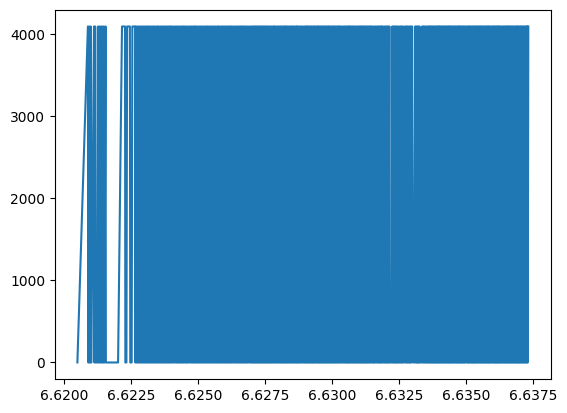

In [7]:
t = np.array(times)
v = np.array(values)
plt.plot(t[:1000],v[:1000])

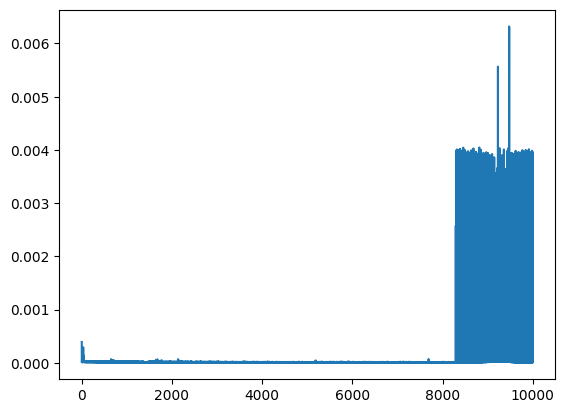

In [19]:
d = np.diff(t)
plt.plot(d)

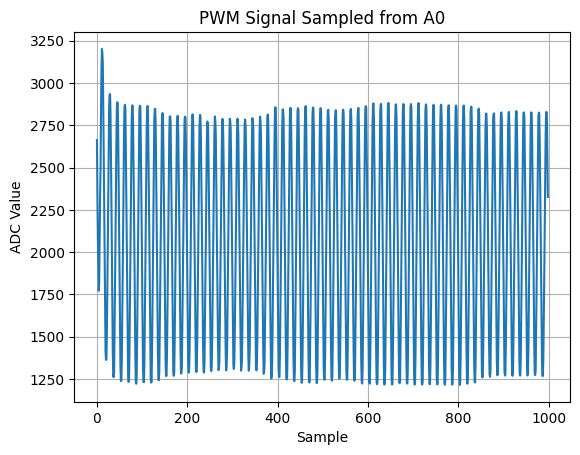

In [1]:
import serial
import matplotlib.pyplot as plt

ser = serial.Serial('/dev/cu.usbmodem1201', 115200)  # Update for your port
vals = []

for _ in range(1000):
    try:
        line = ser.readline().decode().strip()
        vals.append(int(line))
    except:
        pass

plt.plot(vals)
plt.title("PWM Signal Sampled from A0")
plt.ylabel("ADC Value")
plt.xlabel("Sample")
plt.grid(True)
plt.show()


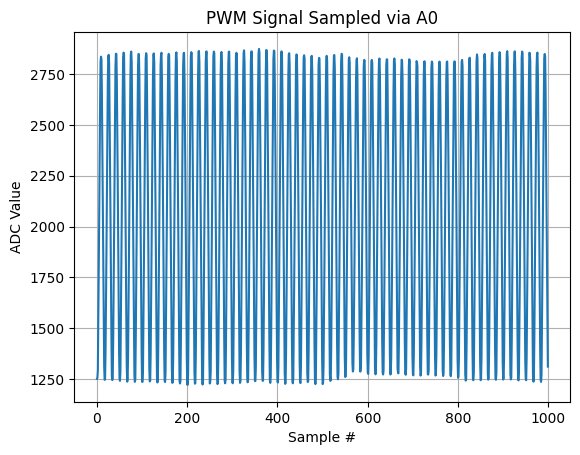

Duty cycle ≈ 50.0%
Estimated PWM frequency ≈ 60.0 Hz


In [2]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parameters
PORT = "/dev/cu.usbmodem1201"   # Update as needed
BAUD = 115200
N_SAMPLES = 1000
THRESHOLD = 2048  # Mid-point of 12-bit ADC

# Connect to serial
ser = serial.Serial(PORT, BAUD)
time.sleep(2)  # Wait for Arduino reset

# Collect samples
samples = []
for _ in range(N_SAMPLES):
    try:
        line = ser.readline().decode().strip()
        val = int(line)
        samples.append(val)
    except:
        continue

ser.close()

# Plot signal
plt.plot(samples)
plt.title("PWM Signal Sampled via A0")
plt.xlabel("Sample #")
plt.ylabel("ADC Value")
plt.grid(True)
plt.show()

# Duty cycle estimation
binary_signal = [1 if v > THRESHOLD else 0 for v in samples]
duty_cycle = sum(binary_signal) / len(binary_signal) * 100
print(f"Duty cycle ≈ {duty_cycle:.1f}%")

# Frequency estimation using rising edges
binary_signal = np.array(binary_signal)
rising_edges = np.where(np.diff(binary_signal) == 1)[0]
if len(rising_edges) >= 2:
    periods = np.diff(rising_edges)
    avg_period_samples = np.mean(periods)
    sample_rate_hz = 1000  # 1 ms delay in Arduino
    frequency = sample_rate_hz / avg_period_samples
    print(f"Estimated PWM frequency ≈ {frequency:.1f} Hz")
else:
    print("Not enough edges detected for frequency estimation.")


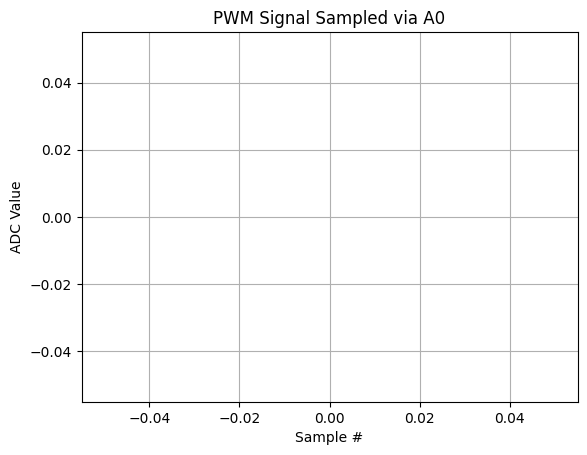

ZeroDivisionError: division by zero

In [6]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parameters
PORT = "/dev/cu.usbmodem1201"   # Update as needed
BAUD = 115200
N_SAMPLES = 1000
THRESHOLD = 2048  # Mid-point of 12-bit ADC

# Connect to serial
ser = serial.Serial(PORT, BAUD)
time.sleep(2)  # Wait for Arduino reset

# Collect samples
samples = []
for _ in range(N_SAMPLES):
    try:
        line = ser.readline().decode().strip()
        val = int(line)
        samples.append(val)
    except:
        continue

ser.close()

# Plot signal
plt.plot(samples)
plt.title("PWM Signal Sampled via A0")
plt.xlabel("Sample #")
plt.ylabel("ADC Value")
plt.grid(True)
plt.show()

# Duty cycle estimation
binary_signal = [1 if v > THRESHOLD else 0 for v in samples]
duty_cycle = sum(binary_signal) / len(binary_signal) * 100
print(f"Duty cycle ≈ {duty_cycle:.1f}%")

# Frequency estimation using rising edges
binary_signal = np.array(binary_signal)
rising_edges = np.where(np.diff(binary_signal) == 1)[0]
if len(rising_edges) >= 2:
    periods = np.diff(rising_edges)
    avg_period_samples = np.mean(periods)
    sample_rate_hz = 1000  # 1 ms delay in Arduino
    frequency = sample_rate_hz / avg_period_samples
    print(f"Estimated PWM frequency ≈ {frequency:.1f} Hz")
else:
    print("Not enough edges detected for frequency estimation.")
